In [1]:
source('../NMEG_utils/r_functions/load_nmeg.r')
library('xts')

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
seg <- daily_to_xts(get_daily_file('Seg', 'aflx', make_new=FALSE))
ses <- daily_to_xts(get_daily_file('Ses', 'aflx', make_new=FALSE))
wjs <- daily_to_xts(get_daily_file('Wjs', 'aflx', make_new=FALSE))
mpj <- daily_to_xts(get_daily_file('Mpj', 'aflx', make_new=FALSE))

In [12]:
# DONT NEED THIS ANYMORE - LEAVING FOR THE TS FILLING CODE

soil_path <- '/home/greg/sftp/eddyflux/Soil_files/provisional'
source('../NMEG_utils/r_functions/load_nmeg.r')
#seg_sqc <- get_multiyr_soilmet('GLand', soil_path, 'qc', startyear=2007, endyear=2014)
#ses <- daily_to_xts(get_daily_file('Ses', make_new=FALSE))
#wjs <- daily_to_xts(get_daily_file('Wjs', make_new=FALSE))
#mpj <- daily_to_xts(get_daily_file('Mpj', make_new=FALSE))
#vcp <- daily_to_xts(get_daily_file('Vcp', make_new=FALSE))
#vcm <- daily_to_xts(get_daily_file('Vcm', make_new=FALSE))
seg_s <- as.xts(seg_sqc[,8:ncol(seg_sqc)-1], as.Date(seg_sqc$date))
seg_s <- apply.daily(seg_s, mean, na.rm=TRUE)
seg_s <- seg_s[1:nrow(seg_s)-1,]
dim(seg_s)
# timeseries is shorter than 8 full years of days (2922)
sum(is.na(seg_s$SWC_G1_22p5_AVG))
# So, create a full 8 year time series to fill in gaps
x <- as.Date("2007-01-01"):as.Date("2014-12-31")
length(x)
# Mergi it into seg_s - missing days will be populated with NA
seg_s <- merge(seg_s, as.Date(x))
dim(seg_s)
sum(is.na(seg_s$SWC_G1_22p5_AVG)) # 224 more NA values
#seg_s <- endpoints(seg_s, on='day')


ERROR: Error in as.xts(seg_sqc[, 8:ncol(seg_sqc) - 1], as.Date(seg_sqc$date)): object 'seg_sqc' not found


[1] 2921  122

[1] 1052

[1] 2922

[1] 2922  122

[1] 1053

In [19]:
seg_s <- daily_to_xts(get_daily_file('Seg', 'soilmet', make_new=FALSE))
ses_s <- daily_to_xts(get_daily_file('Ses', 'soilmet', make_new=FALSE))
wjs_s <- daily_to_xts(get_daily_file('Wjs', 'soilmet', make_new=FALSE))
mpj_s <- daily_to_xts(get_daily_file('Mpj', 'soilmet', make_new=FALSE))

In [59]:

get_decomp_remainder <- function(dframe, site, per=52, plotdecomp=TRUE){
    ts1 <- apply.weekly(dframe, mean)
    attr(ts1, 'frequency') <- 52
    # Timeseries decomp
    decomp_ts1 <- stl(as.ts(ts1), s.window="per", na.action=na.omit, robust=TRUE)
    if (plotdecomp==TRUE){ plot(decomp_ts1, main=site)}
    # Not sure why making a zoo first is needed
    decomp <- as.xts(zoo(decomp_ts1$time.series, index(dframe)))
    return(decomp$remainder)
    
}


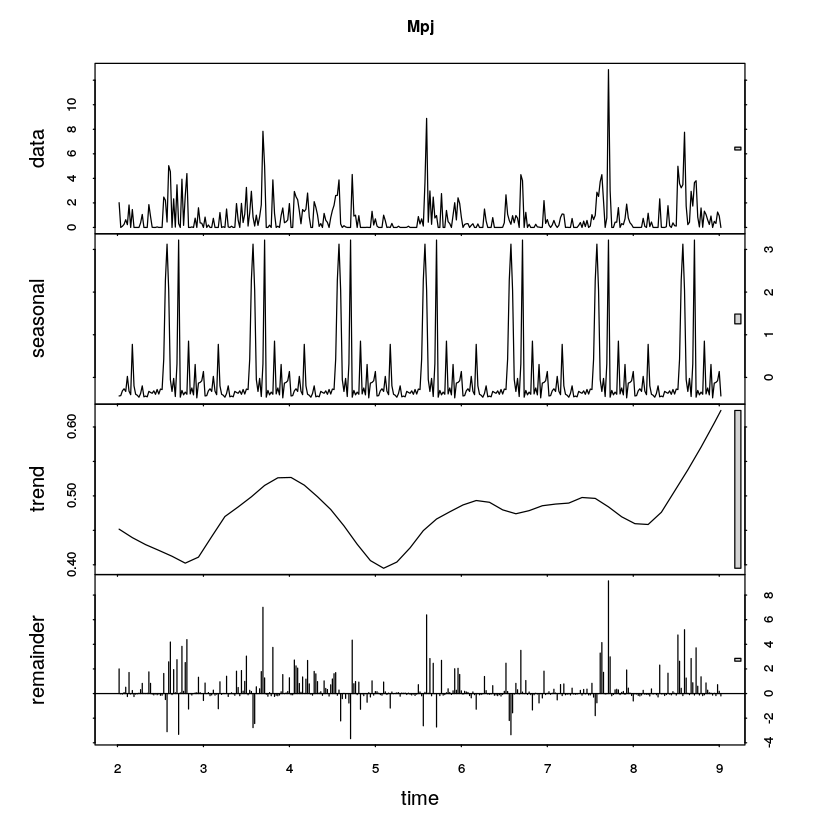

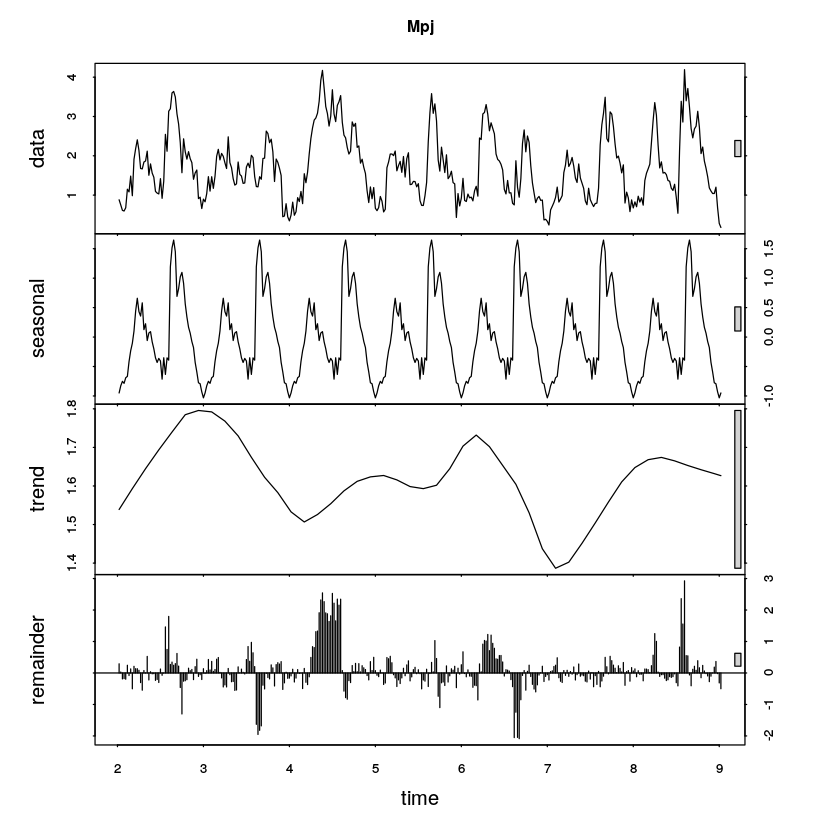

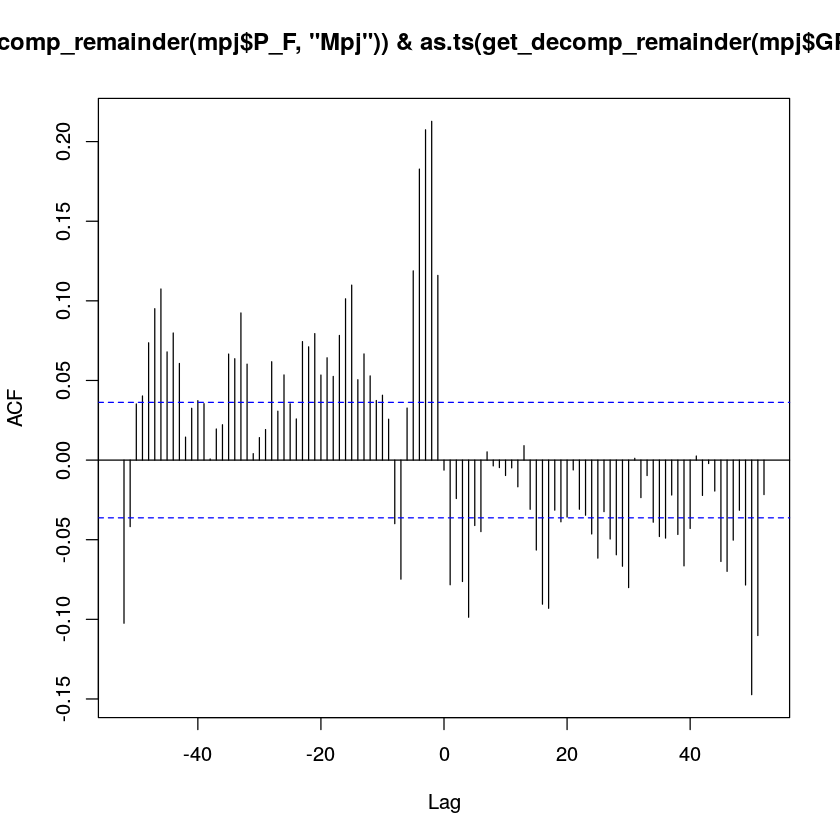

In [75]:
ccf(as.ts(get_decomp_remainder(mpj$P_F, 'Mpj')), as.ts(get_decomp_remainder(mpj$GPP_g_int, 'Mpj')), lag.max=52, na.action=na.omit)

[1] 2922

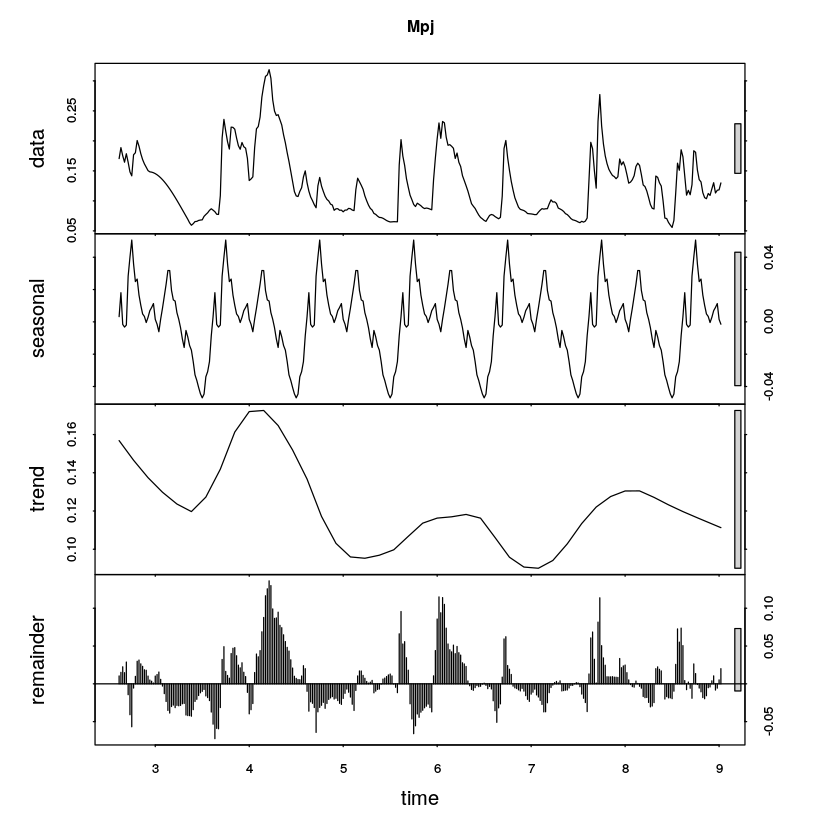

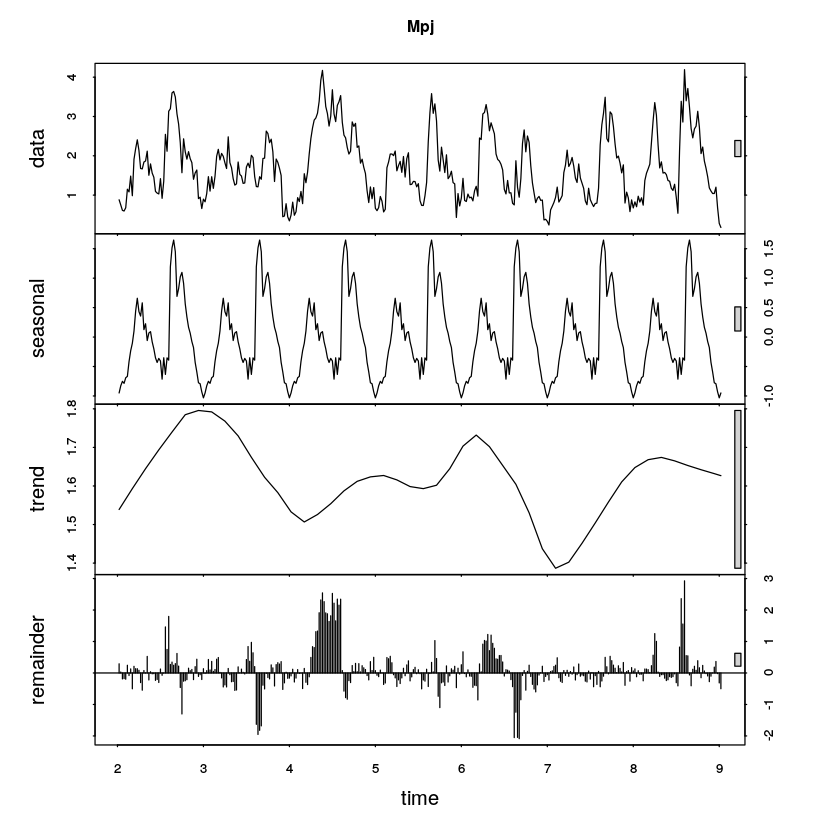

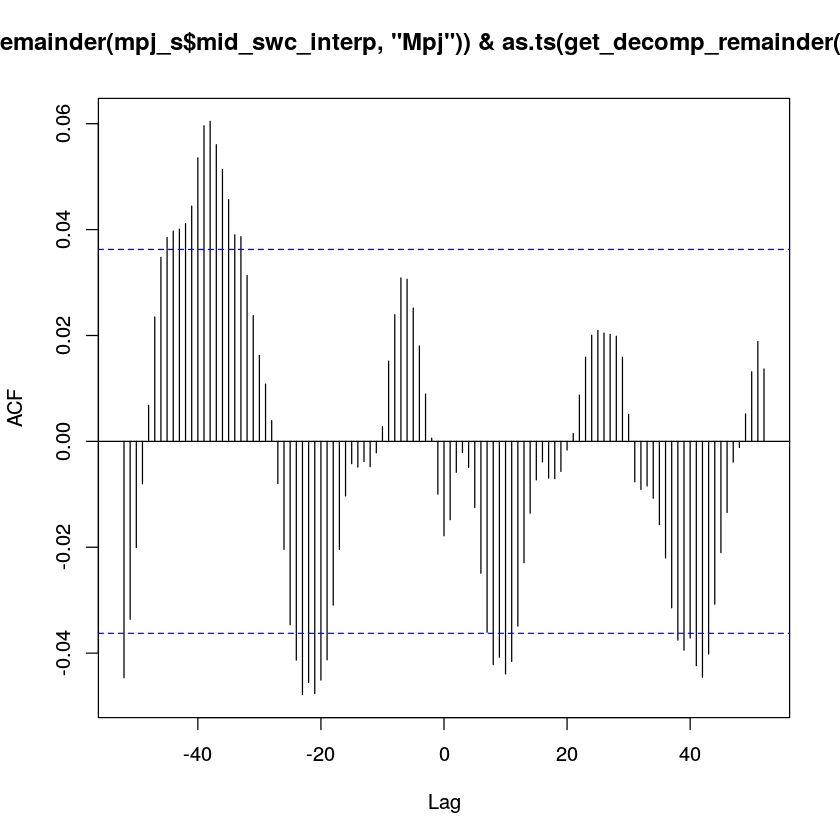

In [74]:
length(is.na(ses$GPP_g_int))
ccf(as.ts(get_decomp_remainder(mpj_s$mid_swc_interp, 'Mpj')), as.ts(get_decomp_remainder(mpj$GPP_g_int, 'Mpj')), lag.max=52, na.action=na.omit)